C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4680\2092262073.py:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, encoding='ISO-8859-1')


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

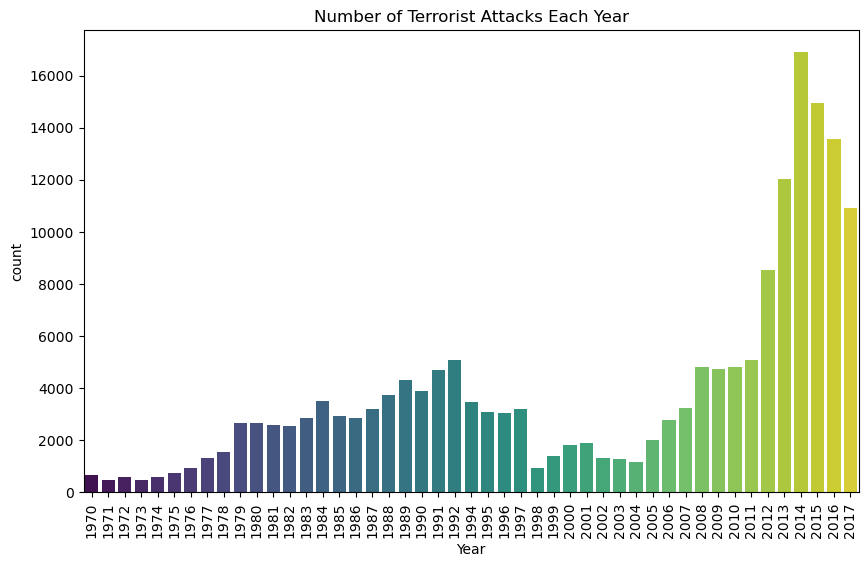

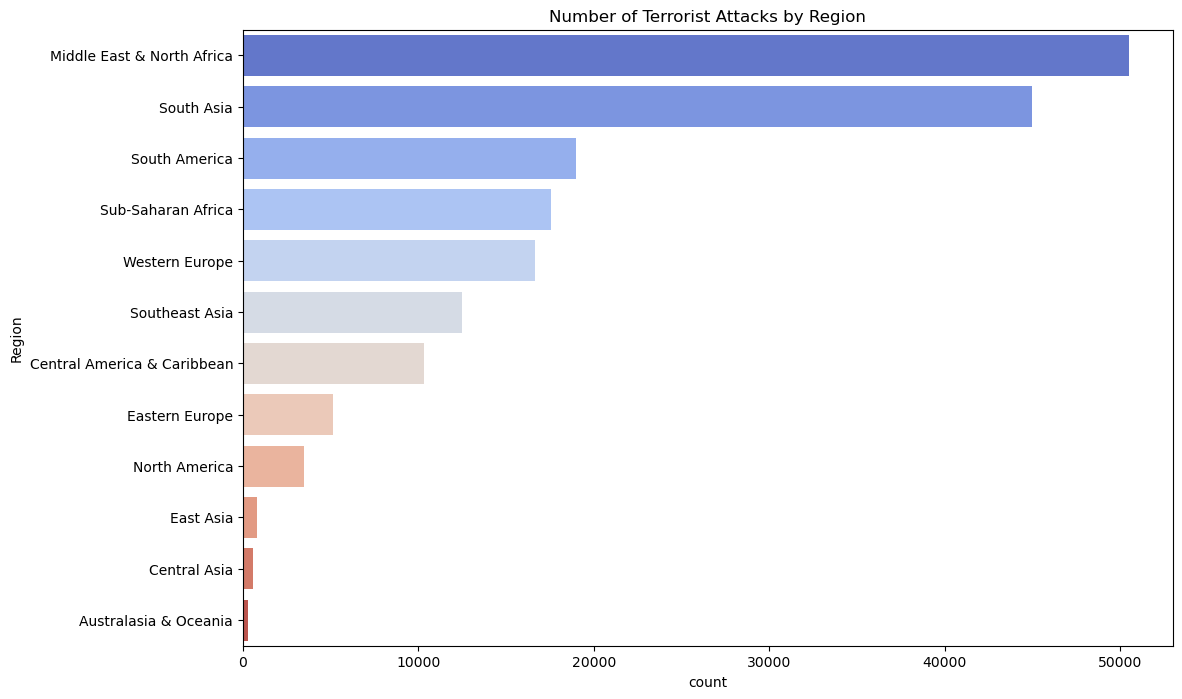

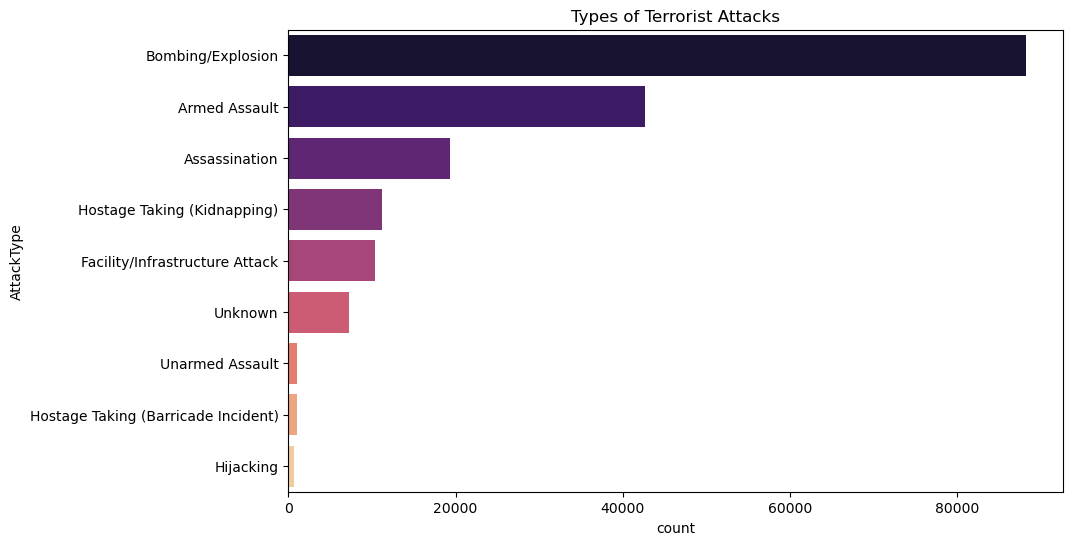

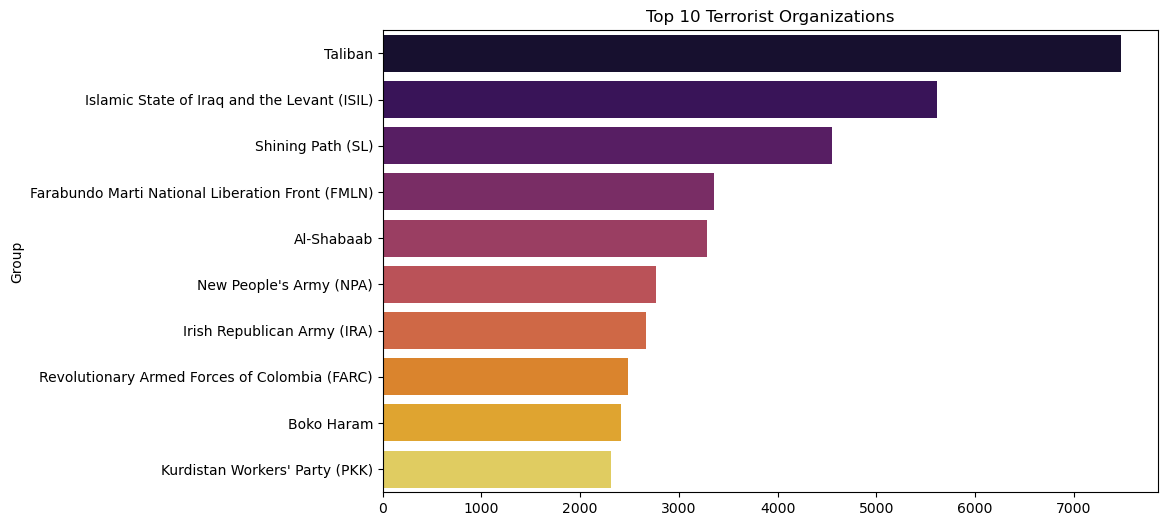

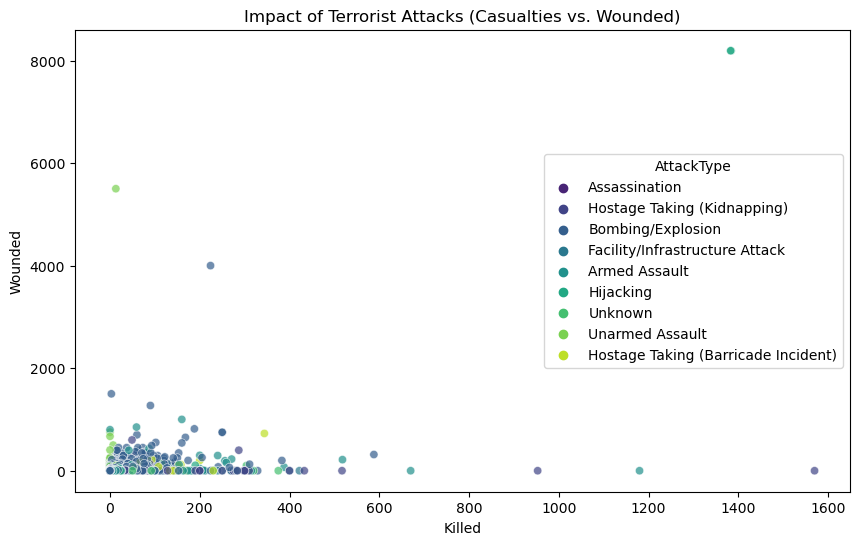

Summary and Insights:
Total number of attacks: 181691
Total number of killed: 411868.0
Total number of wounded: 523869.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'globalterrorismdb.csv' #data_set
df = pd.read_csv(data_path, encoding='ISO-8859-1')
print(df.head())
print(df.info())
print(df.isnull().sum())
df = df.drop(columns=['property', 'propvalue', 'propcomment', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'])
df['nkill'] = df['nkill'].fillna(df['nkill'].median())
df['nwound'] = df['nwound'].fillna(df['nwound'].median())
df = df.dropna(subset=['country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'gname'])
df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 'region_txt': 'Region', 'city': 'City', 'attacktype1_txt': 'AttackType', 'targtype1_txt': 'TargetType', 'weaptype1_txt': 'WeaponType', 'nkill': 'Killed', 'nwound': 'Wounded', 'gname': 'Group'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Attacks Each Year')
plt.show()
plt.figure(figsize=(12, 8))
sns.countplot(y='Region', data=df, palette='coolwarm', order=df['Region'].value_counts().index)
plt.title('Number of Terrorist Attacks by Region')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(y='AttackType', data=df, palette='magma', order=df['AttackType'].value_counts().index)
plt.title('Types of Terrorist Attacks')
plt.show()
top_groups = df['Group'].value_counts()[1:11]  # Excluding "Unknown" group
plt.figure(figsize=(10, 6))
sns.barplot(y=top_groups.index, x=top_groups.values, palette='inferno')
plt.title('Top 10 Terrorist Organizations')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Killed', y='Wounded', data=df, hue='AttackType', alpha=0.7, palette='viridis')
plt.title('Impact of Terrorist Attacks (Casualties vs. Wounded)')
plt.show()
print("Summary and Insights:")
print(f"Total number of attacks: {df.shape[0]}")
print(f"Total number of killed: {df['Killed'].sum()}")
print(f"Total number of wounded: {df['Wounded'].sum()}")